In [1]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

In [2]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

In [3]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(training_dir,
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              batch_size= 16)


Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [4]:
import keras
from keras import layers
from tensorflow.keras.optimizers import Adam

def fireNet(input_shape):
    
    model = keras.models.Sequential([ layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape = input_shape),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(256, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                      
                                      layers.Conv2D(384, (5,5), activation="relu"),
                                      layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                                    
                                      layers.Flatten(),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2048, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(1024, activation="relu"),
                                      layers.Dropout(0.3),
                                     
                                      layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(loss = "categorical_crossentropy",
                  optimizer = Adam(lr = 1e-4),
                  metrics = ["acc"])
    
    return model

In [5]:
model = fireNet(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

C:\Users\Kurtulus-pc\anaconda3\envs\keras_dl\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
history = model.fit( train_generator,
                     steps_per_epoch = 15,
                     epochs = 50,
                     validation_data = validation_generator,
                    validation_steps = 15 )

Epoch 1/50
15/15 [==============================] - 40s 3s/step - loss: 0.5224 - acc: 0.7052 - val_loss: 0.3653 - val_acc: 0.8787
Epoch 2/50
15/15 [==============================] - 31s 2s/step - loss: 0.3304 - acc: 0.8668 - val_loss: 0.2458 - val_acc: 0.9205
Epoch 3/50
15/15 [==============================] - 30s 2s/step - loss: 0.2876 - acc: 0.8843 - val_loss: 0.2496 - val_acc: 0.9247
Epoch 4/50
15/15 [==============================] - 30s 2s/step - loss: 0.2789 - acc: 0.9017 - val_loss: 0.2296 - val_acc: 0.9289
Epoch 5/50
15/15 [==============================] - 30s 2s/step - loss: 0.2747 - acc: 0.8908 - val_loss: 0.2780 - val_acc: 0.8996
Epoch 6/50
15/15 [==============================] - 30s 2s/step - loss: 0.2394 - acc: 0.9072 - val_loss: 0.2278 - val_acc: 0.9331
Epoch 7/50
15/15 [==============================] - 30s 2s/step - loss: 0.2207 - acc: 0.9225 - val_loss: 0.2175 - val_acc: 0.9414
Epoch 8/50
15/15 [==============================] - 30s 2s/step - loss: 0.2131 - acc: 0.92

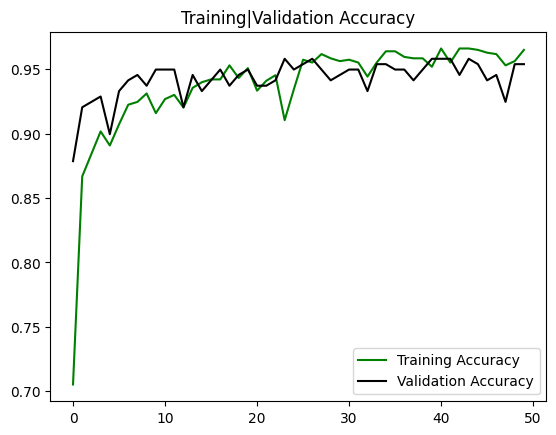

<Figure size 640x480 with 0 Axes>

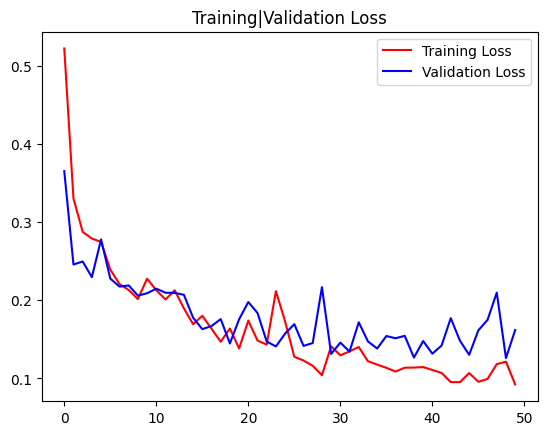

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(0,50)


plt.plot(epochs, acc, "g", label="Training Accuracy")
plt.plot(epochs, val_acc, "black", label="Validation Accuracy")
plt.title("Training|Validation Accuracy")

plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Training|Validation Loss")

plt.legend(loc=0)
plt.figure()
plt.show()



In [8]:
model.save("models/fire_model.h5")

In [1]:
import cv2
import numpy as np
from keras.models import load_model

In [4]:
model = load_model("models/fire_model.h5")
path = "test/test.jpg"
video_path = "test/test.mp4"

In [9]:
test_img = cv2.imread(path)

img = np.asarray(test_img) #array haline getiriyoruz (3 boyutlu)
img = cv2.resize(img, (224,224)) #modelde ki boyuta ayarlıyoruz

img = img/255 #normaliazsyon
#print(img.shape)

img = img.reshape(1,224,224,3) #keras 4 boyutlu arrayler kabul eder (4 boyutlu)
#print(img.shape)

predictions = model.predict(img) #resmi modelden geçiriyoruz
pred = np.argmax(predictions[0]) #bölüm 16 104. bölüm anlaman için #modelden alınan sonuç

probability = predictions[0][pred]
probability_ = "% {:.2f}".format(probability*100)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"
    
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)
color2 = (0,0,255)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,100), font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step


In [11]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    
    img = np.asarray(frame)
    img = cv2.resize(img, (224,224))

    img = img/255
    #print(img.shape)

    img = img.reshape(1,224,224,3)
    #print(img.shape)

    predictions = model.predict(img)
    pred = np.argmax(predictions[0])

    probability = predictions[0][pred]
    probability_ = "% {:.2f}".format(probability*100)

    if pred == 1:
        label = "Fire"
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (0,0,255)
        cv2.putText(frame, label, (35,60), font, 1, color, 2)
        cv2.putText(frame, probability_, (35,100), font, 1, color, 2)
    else:
        label = "Neutral"
        font = cv2.FONT_HERSHEY_SIMPLEX
        color = (0,255,0)
        cv2.putText(frame, label, (35,60), font, 1, color, 2)
        cv2.putText(frame, probability_, (35,100), font, 1, color, 2)



    cv2.imshow("Prediction", frame)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
    
    
cap.release()
cv2.destroyAllWindows()
    



1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 41ms/step
